# Optimasi Anggaran Biaya Pemasaran

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pendahuluan](#intro)
* [Tahap 2. Import Library](#library_import)
* [Tahap 3. Observasi Data](#observation)
    * [3.1 Tabel Visit](#visit)
    * [3.2 Tabel Orders](#orders)
    * [3.3 Tabel Costs](#costs)
* [Tahap 4. Observasi Data](#observation)
    * [4.1 Produk](#product)
        * [4.1.1 Jumlah Orang Yang Menggunakan Produk Setiap Hari, Minggu, dan Bulan](#users)
        * [4.1.2 Jumlah Sesi Per Harinya](#session)
        * [4.1.3 Durasi Untuk Setiap Sesi](#duration)
    * [4.2 Penjualan](#visit)
        * [4.2.1 Waktu Pelanggan Mulai Melakukan Pembelian](#buy_time)
        * [4.2.2 Jumlah Pesanan Yang Mereka Buat Selama Periode Waktu Tertentu](#order_user)
        * [4.2.3 Besaran Rata-Rata Pembeliannya](#mean_buy)
        * [4.2.4 Jumlah Uang Yang Mereka Kontribusikan](#ltv)
    * [4.3 Pemasaran](#marketing)
        * [4.3.1 Jumlah Uang Yang Dihabiskan](#revenue)
        * [4.3.2 Biaya Akuisisi Pelanggan Dari Masing-Masing Sumber](#cac)
        * [4.3.3 ROI](#roi)
* [Kesimpulan](#end)

## Pendahuluan <a id='intro'></a>
Anda berhasil menunjukkan kinerja yang cemerlang selama mengikuti kursus Practicum, dan Anda pun ditawarkan kesempatan untuk menjalani program magang di departemen analitik perusahaan Y.Afisha. Tugas pertama yang mereka berikan kepada Anda adalah membantu mengoptimalkan anggaran biaya pemasaran.

[Kembali ke Daftar Isi](#back)

## Import Library <a id='library_import'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Observasi Data <a id='observation'></a>

### Tabel Visit <a id='visit'></a>

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.shape

(359400, 5)

In [5]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [6]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [8]:
visits[visits['end_ts'] < visits['start_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [9]:
visits = visits[visits['end_ts'] >= visits['start_ts']]

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  object        
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


Dari hasl observasi terhadap tabel visit, didapatkan kesimpulan seperti berikut:
- tipe data untuk kolom 'start_ts' dan 'end_ts' tidak dalam format datetime, sehingga diubah terlebih dahulu
- penyesuaian untuk setiap nama kolom pada tabel diubah ke huruf kecil
- terdapat anomali dimana terdapat dua buah baris yang data waktu 'end_ts' yang terjadi lebih dahulu dibandingkan dengan 'start_ts', data tersebut dihapus sehingga jumah baris yang awalnya 359400 menjadi 359398

### Tabel Orders <a id='orders'></a>

In [11]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [13]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Dari pengamatan terhadap tabel orders hanya terdapat kesalahan tipe data pada kolom 'buy_ts' yang mana seharusnya memiliki tipe data datetime.

### Tabel Costs <a id='costs'></a>

In [15]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Sama dengan tabel orders, tabel costs memiliki kesalahan pada tipe data di kolom 'dt' yang mana seharusnya adalah datetime.

## Menyusun Laporan dan Menghitung Metrik

### Produk

#### Orang Yang Menggunakan Produk Setiap Hari, Minggu, dan Bulan

In [18]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [19]:
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [20]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [21]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

print('Rata-rata pengguna harian adalah', int(dau_total))
print('Rata-rata pengguna mingguan adalah', int(wau_total))
print('Rata-rata pengguna bulan adalah', int(mau_total))

Rata-rata pengguna harian adalah 907
Rata-rata pengguna mingguan adalah 5724
Rata-rata pengguna bulan adalah 23228


In [22]:
dau_monthly = {}

for month, df in visits.groupby('session_month'):
    key = month.strftime('%Y-%m')
    value = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
    dau_monthly[key] = int(value)

In [23]:
dau_monthly

{'2017-06': 510,
 '2017-07': 532,
 '2017-08': 433,
 '2017-09': 739,
 '2017-10': 1133,
 '2017-11': 1328,
 '2017-12': 1240,
 '2018-01': 1096,
 '2018-02': 1217,
 '2018-03': 1052,
 '2018-04': 845,
 '2018-05': 786}

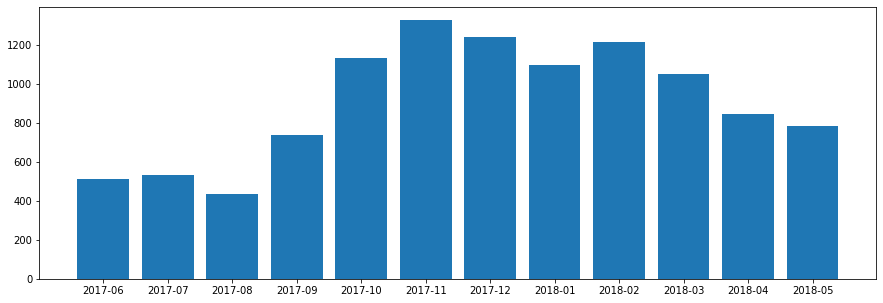

In [24]:
x = [x.replace(' 00:00:00', '') for x in dau_monthly.keys()]
y = dau_monthly.values()

plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.show()

Dari pengolahan terhadap jumlah pengguna, didapatkan kesimpulan sebagai berikut:
- Rata-rata pengguna harian adalah 907 users
- Rata-rata pengguna mingguan adalah 5724 users
- Rata-rata pengguna bulanan adalah 23228 users
- Berdasarkan pengurutan data terhadap bulan, paling banyak pengguna terdapat di bulan November dan Desember, yang kemungkinan banyak user yang ingin berbelanja di akhir tahun.

####  Jumlah Sesi Per Harinya

In [25]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [26]:
session_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['sees_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users'] 

In [27]:
session_per_user.sort_values('sees_per_user')

,n_sessions,n_users,sees_per_user
session_date,,,
2018-03-31,1,1,1.000000
2018-03-30,134,131,1.022901
2017-08-19,300,292,1.027397
2017-06-17,337,328,1.027439
2017-06-24,340,328,1.036585
...,...,...,...
2017-11-29,1480,1296,1.141975
2018-02-01,1878,1640,1.145122
2017-11-25,2089,1817,1.149697


<AxesSubplot:xlabel='session_date'>

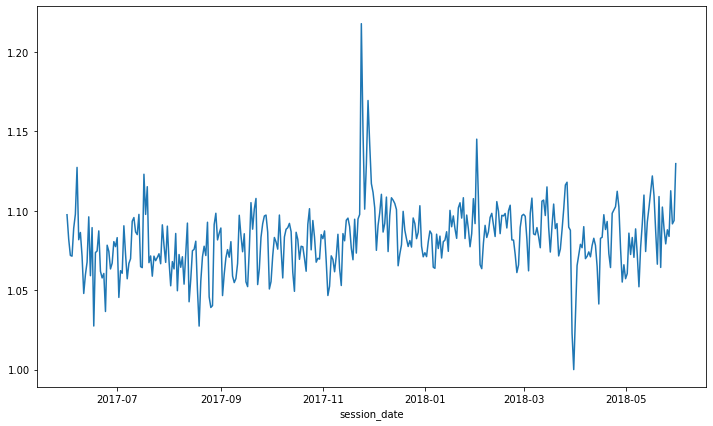

In [28]:
session_per_user['sees_per_user'].plot(kind='line', figsize=(12,7))

Jumlah sesi dibandingkan dengan pengguna paling banyak ditemukan pada tanggal 24 November yaitu sebesar 1.217, bisa dikatakan bahwa sebanyak 0,2 dari user pada tanggal tersebut melakukan akses sebanyak dua kali. Paling sedikit ada pada tanggal 31 Desember yaitu 1.

####  Durasi Untuk Setiap Sesi

In [29]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [30]:
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [31]:
visits['duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration_sec, dtype: float64

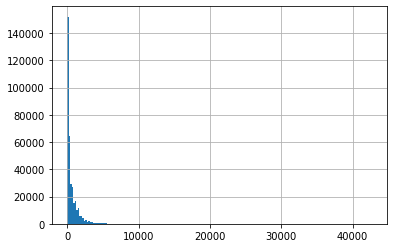

In [32]:
visits['duration_sec'].hist(bins=200);

In [33]:
print('Rata-rata waktu penggunaan: {:.2f} detik'.format(visits['duration_sec'].mean()))
print('Median waktu penggunaan: {:.2f} detik'.format(visits['duration_sec'].median()))
print('Modus waktu penggunaan: {:.2f} detik'.format(visits['duration_sec'].mode()[0]))

Rata-rata waktu penggunaan: 643.04 detik
Median waktu penggunaan: 300.00 detik
Modus waktu penggunaan: 60.00 detik


#### Frekuensi Pengguna Kembali Menggunakan Produk

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [35]:
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_start_visit']

In [36]:
first_visits

,uid,first_start_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [37]:
first_visits['first_session_date'] = first_visits['first_start_visit'].dt.date
first_visits['first_session_week'] = first_visits['first_start_visit'].astype('datetime64[W]')
first_visits['first_session_month'] = first_visits['first_start_visit'].astype('datetime64[M]')
first_visits['first_session_year'] = first_visits['first_start_visit'].astype('datetime64[Y]')

In [38]:
first_visits

,uid,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01
...,...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-30,2017-11-01,2017-01-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-11-30,2017-12-01,2017-01-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2017-12-28,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-21,2017-12-01,2017-01-01


In [39]:
vis = pd.merge(visits, first_visits, on='uid')

vis['age_days'] = (vis['session_date'] - vis['first_session_date']).dt.days
vis['age_months'] = round(vis['age_days'] / 30).astype('int')

In [40]:
vis

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration_sec,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359393,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-01-01,2018-04-01,2018-04-19,2018-04-23,480,2018-04-23 21:11:00,2018-04-23,2018-04-19,2018-04-01,2018-01-01,0,0
359394,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-01-01,2017-11-01,2017-11-02,2017-11-08,0,2017-11-08 13:39:00,2017-11-08,2017-11-02,2017-11-01,2017-01-01,0,0
359395,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-01-01,2017-07-01,2017-07-27,2017-07-31,1080,2017-07-31 12:13:00,2017-07-31,2017-07-27,2017-07-01,2017-01-01,0,0
359396,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-01-01,2018-03-01,2018-03-15,2018-03-20,840,2018-03-20 15:11:00,2018-03-20,2018-03-15,2018-03-01,2018-01-01,0,0


In [41]:
cohorts = vis.pivot_table(index='first_session_month',
                         columns='age_months',
                         values='uid',
                         aggfunc='nunique')

In [42]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [43]:
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col]/cohorts[0]*100], axis=1)
retention.columns = cohorts.columns

In [44]:
retention.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-06-01 00:00:00,100.0,7.202655,5.430274,5.845086,7.119692,6.388114,6.599291,5.377479,5.626367,4.970209,4.344219,3.86907,2.051437
2017-07-01 00:00:00,100.0,5.449011,5.235921,5.136986,5.837139,4.634703,4.611872,4.710807,4.010654,2.884323,2.564688,0.85997,
2017-08-01 00:00:00,100.0,6.787153,6.227286,5.66742,5.372753,4.046754,4.302131,3.339554,2.936843,2.386799,0.569689,,
2017-09-01 00:00:00,100.0,7.417385,6.687021,4.885057,4.088841,3.843391,3.418343,2.514368,2.191092,0.365182,,,
2017-10-01 00:00:00,100.0,7.152481,5.32779,3.695577,3.75332,3.029603,2.175001,1.840089,0.461947,,,,
2017-11-01 00:00:00,100.0,6.785819,4.660893,3.728714,3.302995,2.345126,1.908397,0.392689,,,,,
2017-12-01 00:00:00,100.0,4.974672,4.183157,2.845496,2.283521,1.58303,0.399715,,,,,,
2018-01-01 00:00:00,100.0,5.264321,3.66867,2.461987,1.860856,0.207744,,,,,,,
2018-02-01 00:00:00,100.0,4.680813,2.712078,1.833581,0.301843,,,,,,,,
2018-03-01 00:00:00,100.0,4.055564,2.588761,0.393414,,,,,,,,,


In [45]:
retention[1].mean()

5.361100820922162

In [46]:
retention[2].mean()

4.294894935690882

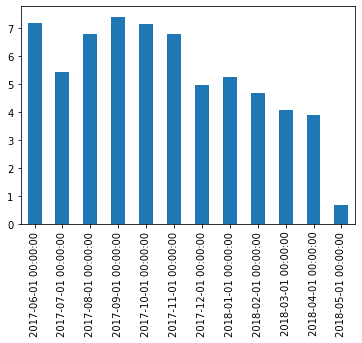

In [47]:
retention[1].plot(kind='bar');

In [48]:
print('Rata-rata pengguna yang kembali setelah kunjungan pertama mereka', retention[1].mean(),'%')

Rata-rata pengguna yang kembali setelah kunjungan pertama mereka 5.361100820922162 %


### Penjualan

#### Waktu Pengguna Melakukan Pembelian

In [49]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [50]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']

first_orders['first_order_date'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[Y]')

In [51]:
first_orders.head()

,uid,first_order_ts,first_order_date,first_order_month,first_order_week
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-01-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-01-01


In [52]:
first_visits.head()

,uid,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018-01-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018-01-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017-01-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017-01-01


In [53]:
first_buy = pd.merge(first_visits, first_orders, on='uid')

In [54]:
first_buy.head()

,uid,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-01-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-01-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-01-01


In [55]:
first_buy.dtypes

uid                            uint64
first_start_visit      datetime64[ns]
first_session_date             object
first_session_week     datetime64[ns]
first_session_month    datetime64[ns]
first_session_year     datetime64[ns]
first_order_ts         datetime64[ns]
first_order_date               object
first_order_month      datetime64[ns]
first_order_week       datetime64[ns]
dtype: object

In [56]:
first_buy['first_order_date'] = pd.to_datetime(first_buy['first_order_date'])
first_buy['first_session_date'] = pd.to_datetime(first_buy['first_session_date'])

first_buy['day_first_purchase'] = (first_buy['first_order_date'] - first_buy['first_session_date']).dt.days

In [57]:
first_buy.head()

,uid,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,day_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-01-01,0


<AxesSubplot:ylabel='Frequency'>

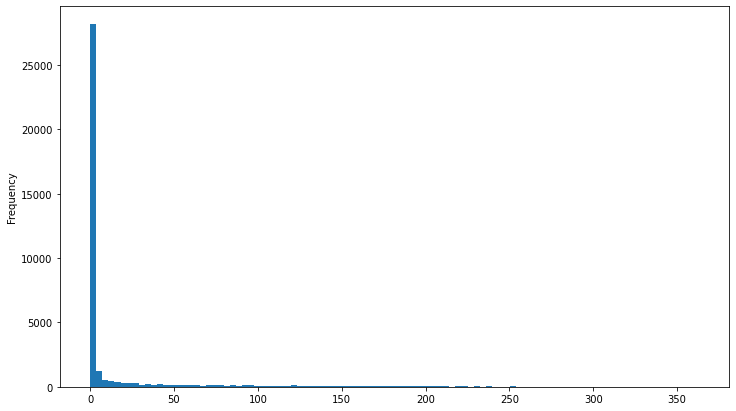

In [58]:
first_buy['day_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7))

In [59]:
first_buy['day_first_purchase'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: day_first_purchase, dtype: float64

In [60]:
first_buy['day_first_purchase'].value_counts()

0      25039
1       1966
2        685
3        452
4        386
       ...  
314        1
309        1
299        1
358        1
341        1
Name: day_first_purchase, Length: 349, dtype: int64

Paling banyak pengguna melakukan pembelian pertama mereka di hari ke-0 atau kurang dari 24 jam sejak mereka masuk ke dalam situs. setelahnya diikuti oleh pelanggan yang melakukan pembelian pada hari pertama sejak mereka pertama kali mengunjungi situs.

#### Jumlah Pesanan Yang Mereka Buat Selama Periode Waktu Tertentu

- Periode waktu yang diambil adalah 6 bulan

In [61]:
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_week'] = orders['buy_ts'].astype('datetime64[W]')

In [62]:
orders.head()

,buy_ts,revenue,uid,order_date,order_month,order_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [63]:
orders_agg = orders.groupby(['uid']).agg({'buy_ts': 'count', 'revenue': 'sum'})

In [64]:
orders_agg.columns = ['count_transaction', 'sum_revenue']

In [65]:
orders_agg

,count_transaction,sum_revenue
uid,,
313578113262317,1,0.55
1575281904278712,2,3.05
2429014661409475,1,73.33
2464366381792757,1,2.44
2551852515556206,2,10.99
...,...,...
18445147675727495770,1,3.05
18445407535914413204,3,0.88
18445601152732270159,1,4.22


In [66]:
orders_agg.describe()

,count_transaction,sum_revenue
count,36523.000000,36523.000000
mean,1.380363,6.901328
std,3.454461,88.128535
min,1.000000,0.000000
25%,1.000000,1.470000
50%,1.000000,3.050000
75%,1.000000,5.800000
max,239.000000,11810.180000


In [67]:
orders.groupby(['order_month']).agg({'buy_ts': 'count', 'revenue': 'sum'})

,buy_ts,revenue
order_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


<AxesSubplot:xlabel='order_month'>

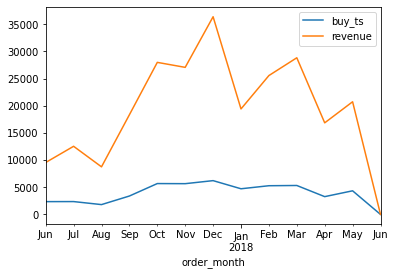

In [68]:
orders.groupby(['order_month']).agg({'buy_ts': 'count', 'revenue': 'sum'}).plot()

Jumlah transaksi dan revenue terbesar didapatkan pada bulan Desember dan selanjutnya pada bulan Oktober. Dapat disimpulkan bahwa banyak user yang melakukan transaksi di akhir tahun, dimana mungkin ada banyak diskon dan clereance sale.

#### Besaran Rata-Rata Pembelian

In [69]:
print('Rata-rata pembelian: ', round(orders['revenue'].mean()))

Rata-rata pembelian:  5


####  Jumlah Uang Yang Mereka Kontribusikan (LTV)

In [70]:
first_buy.head()

,uid,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,day_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017-01-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,2017-01-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-01-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,2017-01-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,2017-01-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,2017-01-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-01-01,0


In [71]:
cohort_sizes = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

In [72]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [73]:
cohorts_1 = pd.merge(orders, first_buy, how='inner', on='uid')
cohorts_1_agg = cohorts_1.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

In [74]:
cohorts_1.head()

,buy_ts,revenue,uid,order_date,order_month,order_week,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,first_order_ts,first_order_date,first_order_month,first_order_week,day_first_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-01-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-01-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-01-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-01-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,2017-01-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-01-01,0


In [75]:
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [76]:
cohorts_1_agg.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [77]:
cohorts_1_agg['age_month'] = (cohorts_1_agg['order_month'] - cohorts_1_agg['first_order_month']).dt.days
cohorts_1_agg['age_month'] = round(cohorts_1_agg['age_month']/30,0).astype('int')
cohorts_1_agg.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']
cohorts_1_agg.head()

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4


In [78]:
margin_rate = 0.5

cohorts_report = pd.merge(cohort_sizes, cohorts_1_agg, on='first_order_month')
cohorts_report['gp'] = cohorts_report['revenue'] * margin_rate
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

In [79]:
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,557.435,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,5300.345,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,604.960,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,6962.880,4.660562


In [80]:
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='ltv',
    aggfunc='mean',
)

In [81]:
cohorts_ltv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


In [82]:
print('Rata-rata LTV untuk 6 bulan adalah', round(cohorts_ltv[6].mean(),2))

Rata-rata LTV untuk 6 bulan adalah 0.36


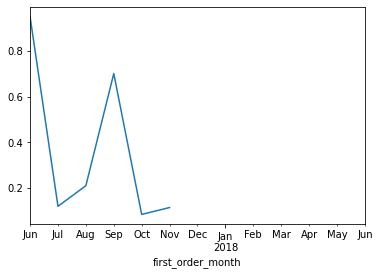

In [83]:
cohorts_ltv[6].plot();

In [84]:
print('Rata-rata LTV untuk bulan yang sama', round(cohorts_ltv[11].mean(),2)) 

Rata-rata LTV untuk bulan yang sama 0.26


### Pemasaran

#### Jumlah Uang Yang Dihabiskan

In [85]:
print('Total penjualan: {}'.format(costs['costs'].sum()))

Total penjualan: 329131.62


In [86]:
print('Total penjualan: {}'.format(costs['costs'].mean()))

Total penjualan: 129.47742722265932


In [87]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [88]:
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


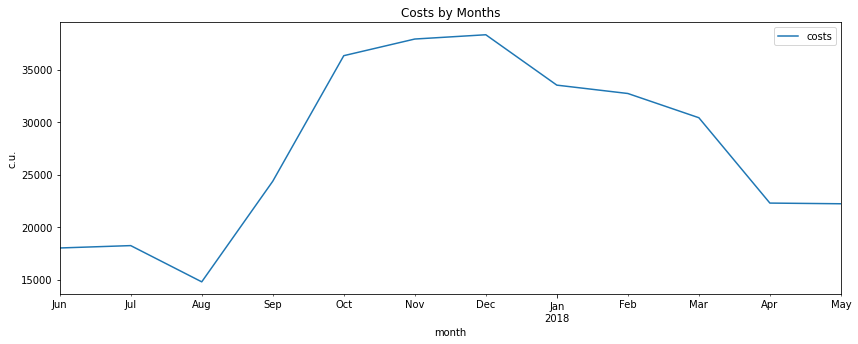

In [89]:
(costs.pivot_table(index='costs_month', values='costs', aggfunc='sum')
    .plot(figsize=(14,5), title='Costs by Months', xlabel='month', ylabel='c.u.'))
plt.show()

In [90]:
print(costs.groupby('costs_month').agg({'costs': 'sum'}))

                costs
costs_month          
2017-06-01   18015.00
2017-07-01   18240.59
2017-08-01   14790.54
2017-09-01   24368.91
2017-10-01   36322.88
2017-11-01   37907.88
2017-12-01   38315.35
2018-01-01   33518.52
2018-02-01   32723.03
2018-03-01   30415.27
2018-04-01   22289.38
2018-05-01   22224.27


In [91]:
print(costs.groupby('source_id').agg({'costs': 'sum'}))

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


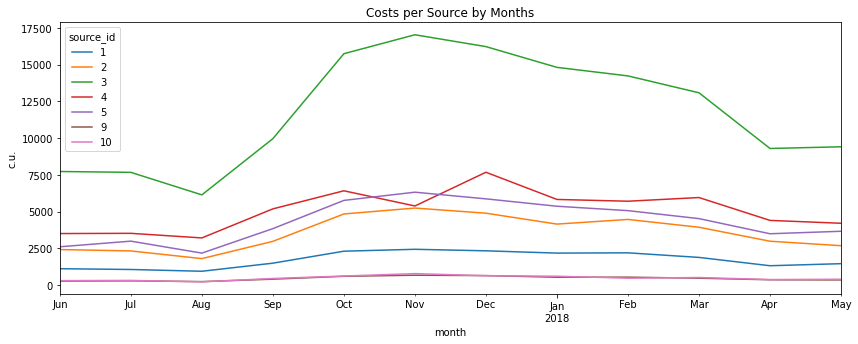

In [92]:
(costs.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum')
    .plot(figsize=(14,5), title='Costs per Source by Months', xlabel='month', ylabel='c.u.'))
plt.show()

Jumlah uang yang dihabiskan paling banyak adalah pada source 3 sebanyak 141321.63 dan paling besar biaya dihabiskan di bulan Desember. Ini sejalan dengan jumlah transaksi yang terjadi di bulan Desember dimana menjadi bulan yang paling tinggi transaksinya.

#### Biaya Akuisisi Pelanggan Dari Masing-Masing Sumber

In [93]:
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [94]:
print('Rata-rata CAC adalah', round(costs['costs'].sum() / orders['uid'].nunique(), 2))

Rata-rata CAC adalah 9.01


In [95]:
vis.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration_sec,first_start_visit,first_session_date,first_session_week,first_session_month,first_session_year,age_days,age_months
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-01-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-01-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,72,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-08,2018-03-01,2018-01-01,0,0


In [96]:
user = vis.sort_values('start_ts').groupby('uid').first()
user = user[['source_id']]
buyer = pd.merge(first_buy, user, left_on='uid', right_index=True)

In [97]:
user

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [98]:
buyer_daily = buyer.groupby(['source_id', 'first_order_date']).agg({'uid': 'count'}).reset_index()
buyer_daily.rename(columns={'uid': 'n_buyer'}, inplace=True)
buyer_daily['first_order_date'] = pd.to_datetime(buyer_daily['first_order_date'])

In [99]:
buyer_daily.head()

,source_id,first_order_date,n_buyer
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [100]:
cost = pd.merge(buyer_daily, costs, left_on=['source_id', 'first_order_date'], right_on=['source_id', 'dt'])
cost['cac'] = cost['costs'] / cost['n_buyer']

In [101]:
cost.head()

,source_id,first_order_date,n_buyer,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


In [102]:
cost.groupby('source_id').agg({'cac': 'mean'}).round(2)

,cac
source_id,
1,9.49
2,16.29
3,15.58
4,7.27
5,8.34
9,6.84
10,6.56


CAC berdasarkan sumber 2 memiliki nilai tertinggi yang berarti biaya untuk mendapatkan pelanggan baru terbilang lebih besar dari yang lainnya, dimana tidak sejalan dengan biaya yang dihabiskan per sumber. Jika melihat per sumber maka sumber 3 adalah sumber yang memakan biaya paling besar.

#### ROI

In [103]:
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyer = buyer.merge(month_revenue, on='uid')

In [104]:
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,557.435,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,5300.345,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,604.960,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,6962.880,4.660562


In [137]:
result = cohorts_report.pivot_table(
    index='first_order_month', columns='age_month', values='ltv', aggfunc='mean'
)
result = result.fillna('')
result

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02-01,4.156987,0.278274,0.078515,0.074144,,,,,,,,


In [147]:
monthly_costs = costs.groupby('costs_month').sum()
monthly_costs.drop('source_id', axis=1)

,costs
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [149]:
report_ = pd.merge(
    cohorts_report, monthly_costs, left_on='first_order_month', right_on='costs_month'
)
report_

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv,source_id,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,4.724414,1020,18015.00
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.485329,1020,18015.00
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.437637,1020,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.954671,1020,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,1.022531,1020,18015.00
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,531.525,0.300892,1025,30415.27
74,2018-03-01,3533,2018-05-01,1114.87,2,557.435,0.315559,1025,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,0,5300.345,4.657597,986,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,1,604.960,0.531599,986,22289.38


In [150]:
report_['cac'] = report_['costs'] / report_['n_buyers']
report_['roi'] = report_['ltv'] / report_['cac']

In [151]:
report_

,first_order_month,n_buyers,order_month,revenue,age_month,gp,ltv,source_id,costs,cac,roi
0,2017-06-01,2023,2017-06-01,9557.49,0,4778.745,4.724414,1020,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,490.910,0.485329,1020,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,442.670,0.437637,1020,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,965.650,0.954671,1020,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1034.290,1.022531,1020,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,531.525,0.300892,1025,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,2,557.435,0.315559,1025,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,0,5300.345,4.657597,986,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1,604.960,0.531599,986,22289.38,9.793225,0.054282


In [154]:
output = report_.pivot_table(
    index='first_order_month', columns='age_month', values='roi', aggfunc='mean'
)

In [156]:
output.cumsum(axis=1).round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


## Kesimpulan

Dari pengolahan beberapa sumber data untuk optimasi anggaran biaya pemasaran adalah sebagai berikut:
- Tabel costs, orders, dan visit memiliki kesalahan di tipe data untuk waktu
- Rata-rata pengguna harian, mingguan, dan bulanan secara berturut-turut adalah 907, 5724, dan 23228 users
- Jumlah sesi dibandingkan dengan pengguna paling banyak ditemukan pada tanggal 24 November yaitu sebesar 1.217
- Rata-rata pengguna yang kembali setelah kunjungan pertama mereka 5.36%
- Paling banyak pengguna melakukan pembelian pertama mereka di hari ke-0 atau kurang dari 24 jam sejak mereka masuk ke dalam situs. Setelahnya diikuti oleh pelanggan yang melakukan pembelian pada hari pertama sejak mereka pertama kali mengunjungi situs.
- Rata-rata pembelian:  5
- Rata-rata LTV untuk bulan yang sama 0.26
- Jumlah uang yang dihabiskan paling banyak adalah pada source 3 sebanyak 141321.63 dan paling besar biaya dihabiskan di bulan Desember. Ini sejalan dengan jumlah transaksi yang terjadi di bulan Desember dimana menjadi bulan yang paling tinggi transaksinya.
- CAC berdasarkan sumber 2 memiliki nilai tertinggi yang berarti biaya untuk mendapatkan pelanggan baru terbilang lebih besar dari yang lainnya, dimana tidak sejalan dengan biaya yang dihabiskan per sumber. Jika melihat per sumber maka sumber 3 adalah sumber yang memakan biaya paling besar.